In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!  kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

 99% 780M/787M [00:06<00:00, 140MB/s]
100% 787M/787M [00:06<00:00, 133MB/s]


In [5]:
!unzip kaggle-cat-vs-dog-dataset.zip -d /content/Dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/549.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5490.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5491.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5492.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5493.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5494.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5495.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5496.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5497.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5498.jpg  
  inflating: /content/Dataset/kagglecatsanddogs_3367a/PetImages/Dog/5499.jpg  
  

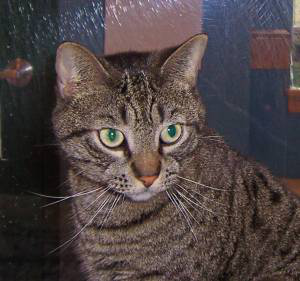

In [6]:
import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import rcParams
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
import matplotlib as mpl
import warnings
src_img = Image.open('/content/Dataset/kagglecatsanddogs_3367a/PetImages/Cat/1.jpg')
display(src_img)

In [7]:
# print the size of image 
np.array(src_img).shape

(281, 300, 3)

array([[0.16753412, 0.16614235, 0.19947922, ..., 0.42413255, 0.70356863,
        0.77999098],
       [0.16753412, 0.15157216, 0.19135333, ..., 0.42609686, 0.68704118,
        0.76850118],
       [0.16361255, 0.13980745, 0.16390235, ..., 0.40005961, 0.68872275,
        0.76428902],
       ...,
       [0.08038078, 0.07253765, 0.08038078, ..., 0.22928745, 0.28587882,
        0.23995882],
       [0.09214549, 0.07253765, 0.07645922, ..., 0.18138039, 0.16794902,
        0.13771529],
       [0.10783176, 0.08430235, 0.09214549, ..., 0.26316784, 0.13909922,
        0.1371498 ]])

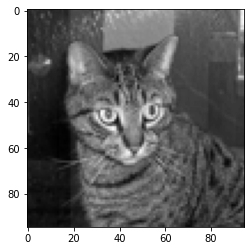

In [8]:
# convert image from rgb to gray scale
img =Image.open('/content/Dataset/kagglecatsanddogs_3367a/PetImages/Cat/1.jpg')
# down size image pixels 
img =img.resize((95,95))
img= np.array(img)
gray_img =rgb2gray(img)
display(gray_img)
plt.imshow(gray_img,cmap=mpl.cm.gray)

[0.         0.         0.         ... 0.05058105 0.08356355 0.12931923]
(9754,)


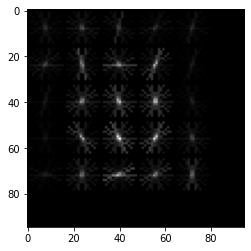

In [9]:
# run HOG using our greyscale bombus image
from skimage.feature import hog
hog_features,hog_image = hog(gray_img,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

plt.imshow(hog_image,cmap=mpl.cm.gray)
flat_hog=np.array(hog_features).flatten()
hog_image =np.array(hog_image).flatten()
# print(flat_hog)
data_with=np.hstack([hog_image,hog_features])
print(data_with)
print(np.array(data_with).shape)
# print(hog_image)
# print(hog_features)

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
import cv2
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, SpatialDropout2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import to_categorical


Dir = "/content/Dataset/kagglecatsanddogs_3367a/PetImages"
cts = ["Dog", "Cat"]

data = []
# intialize the object of histograms
hog = cv2.HOGDescriptor()

from skimage.feature import hog

for ct in cts:
    path = os.path.join(Dir, ct)
    for img in os.listdir(path):
        try:        
          img = Image.open(os.path.join(path, img))
          # img = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
          if img is not None:
              img =img.resize((95,95))
              img =np.array(img)
              gray_img =rgb2gray(img)
              # img = cv2.resize(img, (96, 96))
              hog_features,hog_image = hog(gray_img,
                                visualize=True,
                                block_norm='L2-Hys',
                                pixels_per_cell=(16, 16))
              # hog_image=np.array(hog_image).flatten()
              flat_hog=np.array(hog_features).flatten()
              # compine_hog=np.hstack([hog_image,flat_hog])
              data.append([flat_hog, cts.index(ct)])
        except:
          continue;


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipp

In [11]:
# print the number of sample 
print(len(data))

24959


In [12]:
# random this dataset 
random.shuffle(data)
features = []
labels  = []
# split the features and lables 
for feature,label in data:
    features.append(feature)
    labels .append(label)

In [13]:
# print the number of training sample 
print(len(features))
print("the shape of features:",np.array(features).shape)
# print the number of testing sample 
print(len(labels))

24959
the shape of features: (24959, 729)
24959


In [14]:
#Scale feature matrix + PCA
from sklearn.preprocessing import StandardScaler
# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
features_standard = ss.fit_transform(features)
pca =PCA(n_components = 0.95)
pca.fit(features_standard)
reduced_features =pca.transform(features_standard)
print(np.array(reduced_features).shape)

(24959, 159)


In [22]:
# splitting data to data train and data for testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(reduced_features,labels,test_size = 0.30)
# number of data for training 
x_train = np.array(x_train)
print("the number of sample for training:",len(x_train))
# number of sample data for testing
x_test = np.array(x_test)
print("the number of sample for testing",len(x_test))
# number of sample data for validation training
y_train = np.array(y_train)
print("the number of sample for validation training:",len(y_train))
# number of sample data for validation test
y_test = np.array(y_test)
print("the number of sample for  validation test:",len(y_test))

the number of sample for training: 17471
the number of sample for testing 7488
the number of sample for validation training: 17471
the number of sample for  validation test: 7488


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean
Cv = KFold(n_splits=4, random_state=1, shuffle=True)
scores = cross_val_score(SVC(), x_train[0:1000,:], y_train[0:1000], scoring='accuracy', cv=Cv, n_jobs=-1)
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), np.std(scores)))

[0.716 0.7   0.692 0.716]
Accuracy: 0.706 (0.010)


In [46]:
# print(reduced_features[0:4,:])
# print(y_train[0:4])
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Grid search for best parameters
grid_param =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1,1, 10]},
               {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1,1, 10] },
               {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1,1, 10]}]
Grid_search = GridSearchCV(SVC(), grid_param,cv=Cv, scoring='accuracy')
Grid_search.fit(x_train[0:1000,:],y_train[0:1000])
best_parameters = Grid_search.best_params_
print(best_parameters)
best_result = Grid_search.best_score_
print(best_result)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.7109999999999999


In [48]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',C=1,gamma=.001, probability=True, random_state=42)
model.fit(x_train,y_train)

SVC(C=1, gamma=0.001, probability=True, random_state=42)

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred)
y_pred = model.predict(x_test)
# y_pred_bool = np.argmax(y_pred, axis=1)

# print(classification_report(y_test, y_pred_bool))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


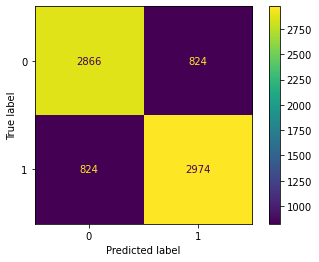

In [50]:
#Generate the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test) 
plt.show() 

In [51]:
# y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3690
           1       0.78      0.78      0.78      3798

    accuracy                           0.78      7488
   macro avg       0.78      0.78      0.78      7488
weighted avg       0.78      0.78      0.78      7488



In [52]:
probabilities = model.predict_proba(x_test)

[0 1 0 ... 0 1 1]


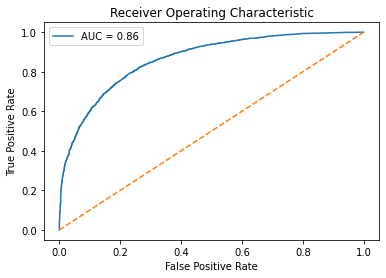

In [53]:
# probabilities = model.predict_proba(x_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

print(y_test)
# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');